In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from fastai import *
from fastai.vision import *
import os
from os import listdir
%reload_ext autoreload
%autoreload 2
%matplotlib inline
path = "/content/drive/MyDrive/New Plant Diseases Dataset/New Plant Diseases Dataset"
os.listdir(path)

['train', 'valid']

In [ ]:
path = Path(path); path

PosixPath('/content/drive/MyDrive/New Plant Diseases Dataset/New Plant Diseases Dataset')

In [ ]:
directory_root = '/content/drive/MyDrive/New Plant Diseases Dataset'
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(image_directory)
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Late_blight ...
Er

In [ ]:
tfms = get_transforms(flip_vert=True, max_warp=0., max_zoom=0., max_rotate=0.)

In [ ]:
file_path = '/content/drive/MyDrive/New Plant Diseases Dataset/train/Tomato___Bacterial_spot/00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG'

In [ ]:
dir_name = os.path.dirname(file_path)

In [ ]:
dir_length = len(dir_name.split("/"))
dir_name.split("/")

['',
 'content',
 'drive',
 'MyDrive',
 'New Plant Diseases Dataset',
 'train',
 'Tomato___Bacterial_spot']

In [ ]:
dir_name.split("/")[dir_length - 1]

'Tomato___Bacterial_spot'

In [ ]:
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_length = len(split_dir_name)
    label  = split_dir_name[dir_length - 1]
    return(label)

In [ ]:
data = ImageDataBunch.from_name_func(path, image_list, label_func=get_labels,  size=224, 
                                     bs=64,num_workers=2,ds_tfms=tfms)
data = data.normalize()

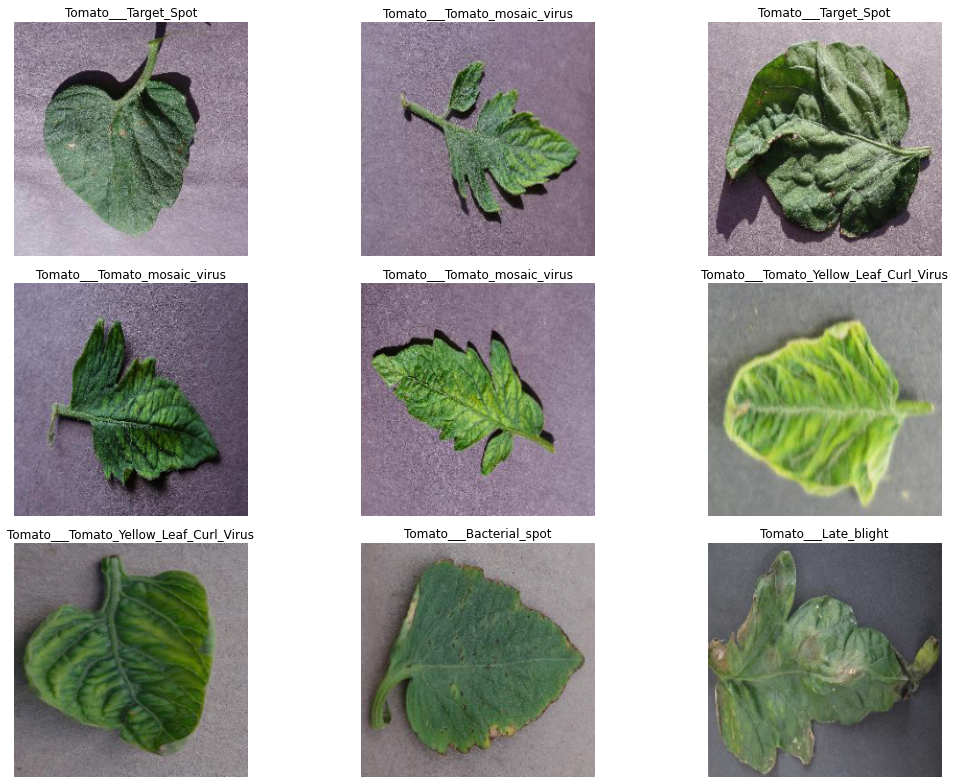

In [ ]:
data.show_batch(rows=3, figsize=(15,11))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir='/tmp/models/')

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.323417,0.844030,0.276250,16:49
1,1.286990,0.466921,0.151250,00:35
2,0.851718,0.380288,0.115000,00:35
3,0.628237,0.308401,0.111250,00:35
4,0.468161,0.231420,0.076250,00:35
5,0.365309,0.212451,0.066250,00:35
6,0.298722,0.189025,0.056250,00:35
7,0.251128,0.181552,0.053750,00:35
8,0.214433,0.176067,0.053750,00:36
9,0.208053,0.175111,0.052500,00:35


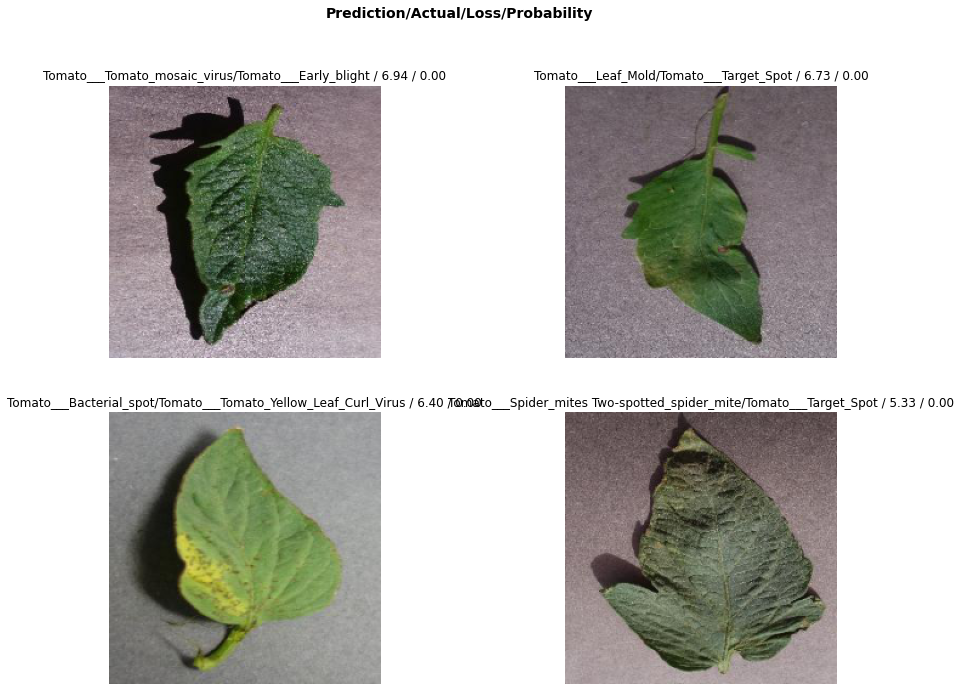

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learn)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(4, figsize=(15,11))

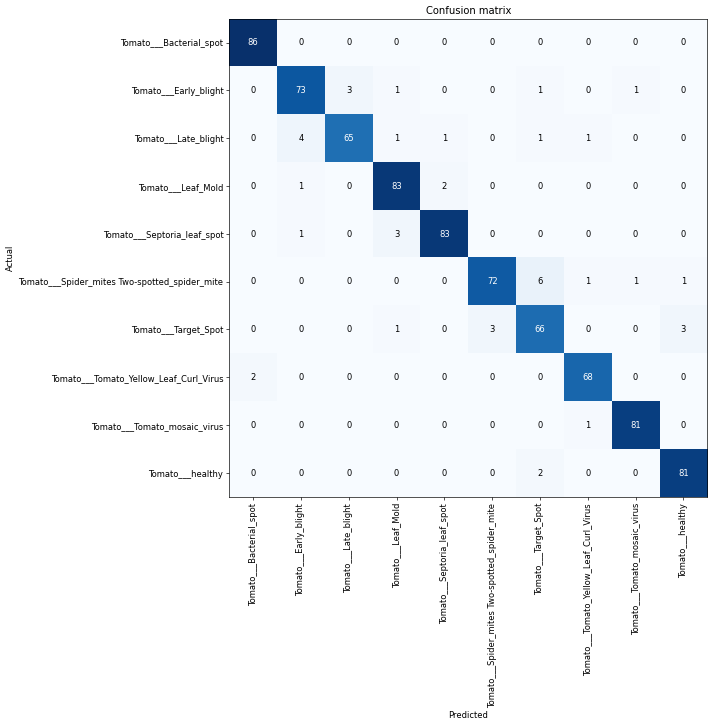

In [ ]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interpretation.most_confused(min_val=2)

[('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 6),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 4),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 3),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 3),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 3),
 ('Tomato___Target_Spot', 'Tomato___healthy', 3),
 ('Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 2),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 2),
 ('Tomato___healthy', 'Tomato___Target_Spot', 2)]

In [ ]:
learn.save('classification-1')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.396304,0.265937,0.088750,00:38


In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


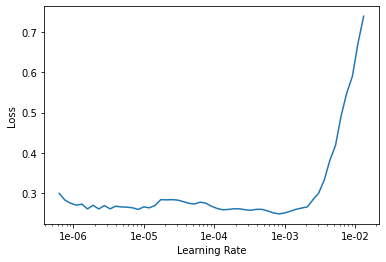

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.220962,0.128692,0.040000,00:38
1,0.174202,0.080375,0.026250,00:38
2,0.124925,0.068372,0.022500,00:38


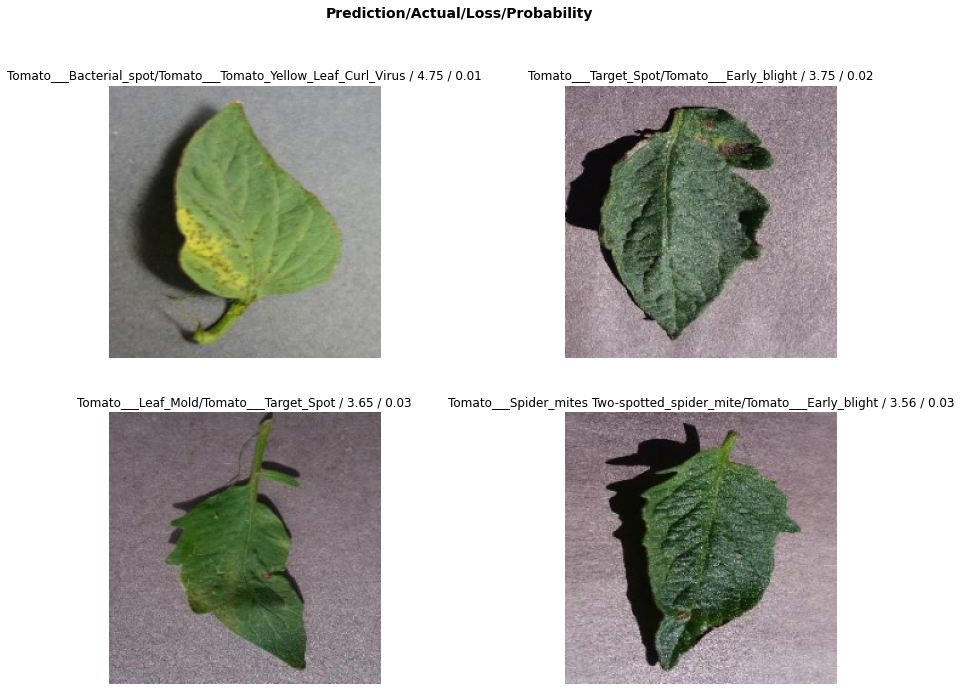

In [ ]:
interpretation = ClassificationInterpretation.from_learner(learn)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(4, figsize=(15,11))

In [ ]:
interpretation.most_confused(min_val=2)

[('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 4),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 2)]